In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [83]:
# Loading the dataset movies.csv
Dataset1 = pd.read_csv("/content/movies.csv")
Dataset1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
# Loading the dataset ratings.csv
Dataset2 = pd.read_csv("/content/ratings.csv")
Dataset2.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
Dataset2.shape

(100836, 4)

# **Data Preprocessing**

In [11]:
Dataset1.drop("genres",inplace = True, axis =1)
Dataset1.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [12]:
Dataset2.drop("timestamp",inplace = True, axis =1)
Dataset2.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [15]:
merged_movie_df = pd.merge(Dataset2, Dataset1, on="movieId")
merged_movie_df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,1,3,4.0,Grumpier Old Men (1995)
2,1,6,4.0,Heat (1995)
3,1,47,5.0,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,"Usual Suspects, The (1995)"


# Data **Visualization**

In [14]:
merged_movie_df.groupby("title").describe()

userId                          \
                                           count        mean         std   
title                                                                      
'71 (2014)                                   1.0  610.000000         NaN   
'Hellboy': The Seeds of Creation (2004)      1.0  332.000000         NaN   
'Round Midnight (1986)                       2.0  354.500000   31.819805   
'Salem's Lot (2004)                          1.0  345.000000         NaN   
'Til There Was You (1997)                    2.0  229.000000  164.048773   
...                                          ...         ...         ...   
eXistenZ (1999)                             22.0  389.954545  167.161022   
xXx (2002)                                  24.0  272.916667  174.297576   
xXx: State of the Union (2005)               5.0  386.000000  148.801882   
¡Three Amigos! (1986)                       26.0  279.807692  193.794947   
À nous la liberté (Freedom for Us) (1931)    1.0  527.000000         NaN   

                                                                         \
                                             min     25%    50%     75%   
title                                                                     
'71 (2014)                                 610.0  610.00  610.0  610.00   
'Hellboy': The Seeds of Creation (2004)    332.0  332.00  332.0  332.00   
'Round Midnight (1986)                     332.0  343.25  354.5  365.75   
'Salem's Lot (2004)                        345.0  345.00  345.0  345.00   
'Til There Was You (1997)                  113.0  171.00  229.0  287.00   
...                                          ...     ...    ...     ...   
eXistenZ (1999)                             95.0  278.25  419.5  509.25   
xXx (2002)                                   9.0  131.25  240.5  418.50   
xXx: State of the Union (2005)             232.0  274.00  382.0  432.00   
¡Three Amigos! (1986)                        1.0  101.25  260.5  441.25   
À nous la liberté (Freedom for Us) (1931)  527.0  527.00  527.0  527.00   

                                                 movieId            ...  \
                                             max   count      mean  ...   
title                                                               ...   
'71 (2014)                                 610.0     1.0  117867.0  ...   
'Hellboy': The Seeds of Creation (2004)    332.0     1.0   97757.0  ...   
'Round Midnight (1986)                     377.0     2.0   26564.0  ...   
'Salem's Lot (2004)                        345.0     1.0   27751.0  ...   
'Til There Was You (1997)                  345.0     2.0     779.0  ...   
...                                          ...     ...       ...  ...   
eXistenZ (1999)                            608.0    22.0    2600.0  ...   
xXx (2002)                                 610.0    24.0    5507.0  ...   
xXx: State of the Union (2005)             610.0     5.0   33158.0  ...   
¡Three Amigos! (1986)                      599.0    26.0    2478.0  ...   
À nous la liberté (Freedom for Us) (1931)  527.0     1.0    5560.0  ...   

                                                              rating  \
                                                75%       max  count   
title                                                                  
'71 (2014)                                 117867.0  117867.0    1.0   
'Hellboy': The Seeds of Creation (2004)     97757.0   97757.0    1.0   
'Round Midnight (1986)                      26564.0   26564.0    2.0   
'Salem's Lot (2004)                         27751.0   27751.0    1.0   
'Til There Was You (1997)                     779.0     779.0    2.0   
...                                             ...       ...    ...   
eXistenZ (1999)                              2600.0    2600.0   22.0   
xXx (2002)                                   5507.0    5507.0   24.0   
xXx: State of the Union (2005)              33158.0   33158.0    5.0   
¡Three Amig

In [16]:
merged_movie_df.groupby("title")["rating"].mean().head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [17]:
merged_movie_df.groupby("title")["rating"].mean().sort_values(ascending=False).head()

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0


In [18]:
merged_movie_df.groupby("title")["rating"].count().sort_values(ascending=False).head()

,rating
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278


In [19]:
movie_rating_mean_count = pd.DataFrame(columns=['rating_mean','rating_count'])

In [20]:
movie_rating_mean_count ["rating_mean"]= merged_movie_df.groupby("title")["rating"].mean()
movie_rating_mean_count["rating_count"] = merged_movie_df.groupby("title")["rating"].count()
movie_rating_mean_count.head()

,rating_mean,rating_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<Axes: >

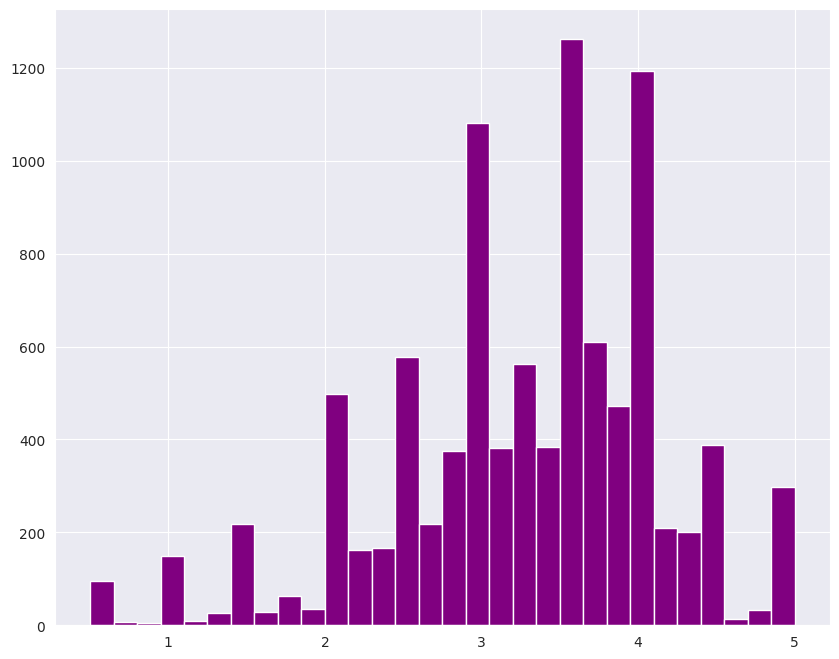

In [21]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
movie_rating_mean_count['rating_mean'].hist(bins=30,color = "purple")

<Axes: >

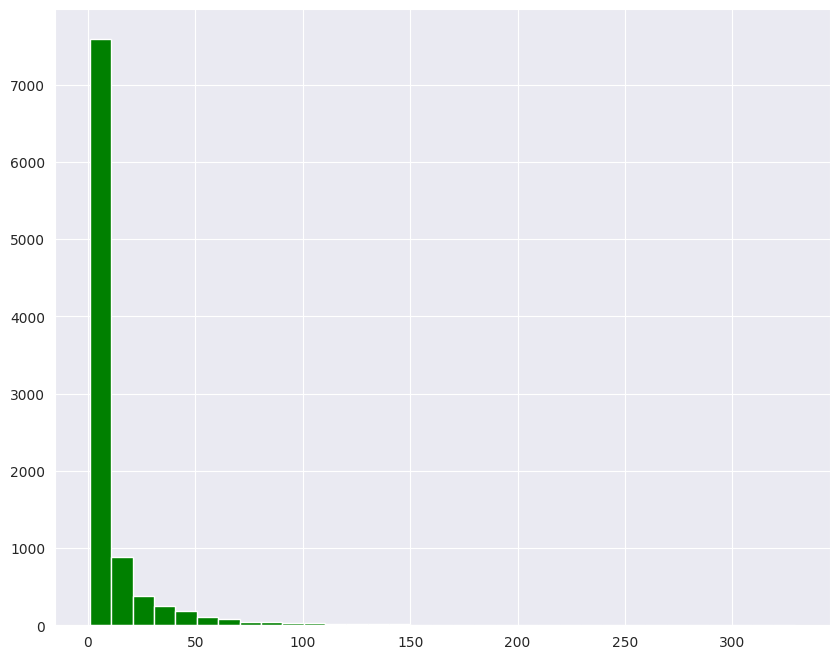

In [22]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
movie_rating_mean_count['rating_count'].hist(bins=33,color = "green")

<Axes: xlabel='rating_mean', ylabel='rating_count'>

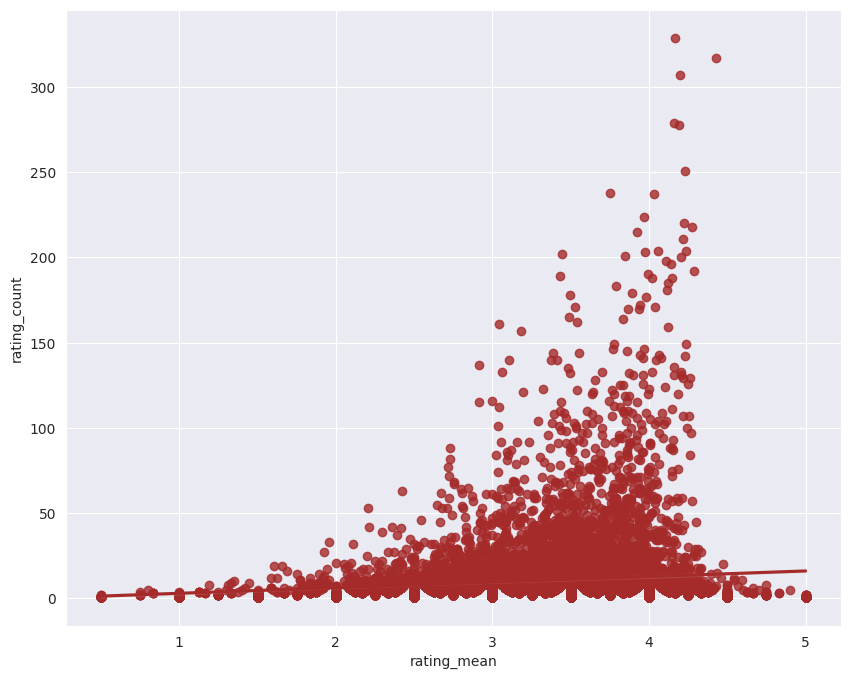

In [28]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.regplot(x='rating_mean', y='rating_count', data=movie_rating_mean_count,color='brown')


In [30]:
movie_rating_mean_count.sort_values('rating_count',ascending=False).head(10)

,rating_mean,rating_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


# **Item-based Collaborative Filltering**

In [31]:
user_movie_rating_matrix = merged_movie_df.pivot_table(index='userId', columns='title', values='rating')
user_movie_rating_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [32]:
user_movie_rating_matrix.shape

(610, 9719)

# **Finding Recommendations Based on a Single Movie**

In [33]:
pulp_fiction_ratings = user_movie_rating_matrix['Pulp Fiction (1994)']
pulp_fiction_ratings.head()

,Pulp Fiction (1994)
userId,
1,3.0
2,NaN
3,NaN
4,1.0
5,5.0


In [34]:
pulp_fiction_correlations = pd.DataFrame(user_movie_rating_matrix.corrwith(pulp_fiction_ratings),columns=['pf_corr'])
pulp_fiction_correlations.head()

,pf_corr
title,
'71 (2014),NaN
'Hellboy': The Seeds of Creation (2004),NaN
'Round Midnight (1986),NaN
'Salem's Lot (2004),NaN
'Til There Was You (1997),NaN


In [45]:
pulp_fiction_correlations.sort_values('pf_corr',ascending = False).head(5)

,pf_corr,rating_count_left,rating_count_right
title,,,
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.0,2,2
Azumi (2003),1.0,2,2
"Maxed Out: Hard Times, Easy Credit and the Era of Predatory Lenders (2006)",1.0,2,2
"War Zone, The (1999)",1.0,2,2
"Wolfman, The (2010)",1.0,2,2


In [44]:
pulp_fiction_correlations = pulp_fiction_correlations.join(movie_rating_mean_count["rating_count"],
                            lsuffix='_left', rsuffix='_right')
pulp_fiction_correlations.head()

,pf_corr,rating_count_left,rating_count_right
title,,,
'71 (2014),NaN,1,1
'Hellboy': The Seeds of Creation (2004),NaN,1,1
'Round Midnight (1986),NaN,2,2
'Salem's Lot (2004),NaN,1,1
'Til There Was You (1997),NaN,2,2


In [46]:
pulp_fiction_correlations.dropna(inplace=True)
pulp_fiction_correlations.head()

,pf_corr,rating_count_left,rating_count_right
title,,,
"'burbs, The (1989)",-0.187323,17,17
(500) Days of Summer (2009),-0.044034,42,42
*batteries not included (1987),-0.738549,7,7
...And Justice for All (1979),-0.188982,3,3
10 Cent Pistol (2015),1.000000,2,2


In [47]:
pulp_fiction_correlations.sort_values('pf_corr',ascending = False).head(5)

,pf_corr,rating_count_left,rating_count_right
title,,,
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.0,2,2
Azumi (2003),1.0,2,2
"Maxed Out: Hard Times, Easy Credit and the Era of Predatory Lenders (2006)",1.0,2,2
"War Zone, The (1999)",1.0,2,2
"Wolfman, The (2010)",1.0,2,2


In [51]:
print(movie_rating_mean_count.columns)

Index(['rating_mean', 'rating_count'], dtype='object')


In [56]:
pulp_fiction_correlations_50 = pulp_fiction_correlations[pulp_fiction_correlations["rating_count_left"]>50]
pulp_fiction_correlations_50.sort_values('pf_corr',ascending = False).head()

,pf_corr,rating_count_left,rating_count_right
title,,,
Pulp Fiction (1994),1.000000,307,307
"Wolf of Wall Street, The (2013)",0.579915,54,54
Fight Club (1999),0.543465,218,218
Kill Bill: Vol. 1 (2003),0.504147,131,131
Interstellar (2014),0.503411,73,73


# Finding Recommendations Based on Multiple **Movies**

In [58]:
all_movies_correlations = user_movie_rating_matrix.corr(method='pearson', min_periods=50)
all_movies_correlations.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
movie_data = [['Forrest Gump(1994)',4.0], ['Fight Club (1999)',3.5],['Interstellar (2014)', 4.0 ]]
test_movies = pd.DataFrame(movie_data, columns=['Title', 'Movie Rating'])
test_movies

,Title,Movie Rating
0,Forrest Gump(1994),4.0
1,Fight Club (1999),3.5
2,Interstellar (2014),4.0


In [78]:
print(test_movies['Title'][0])
print(test_movies['Movie Rating'][0])

Forrest Gump(1994)
4.0


In [87]:
all_movies_correlations["Fight Club (1999)"].dropna()

,Fight Club (1999)
title,
2001: A Space Odyssey (1968),0.037284
300 (2007),0.375286
"40-Year-Old Virgin, The (2005)",0.059684
Ace Ventura: Pet Detective (1994),0.248982
Airplane! (1980),-0.108872
...,...
Who Framed Roger Rabbit? (1988),0.249810
Willy Wonka & the Chocolate Factory (1971),0.189706
"Wizard of Oz, The (1939)",-0.277474


In [88]:
recommended_movies = pd.Series(dtype=float)
for i in range(0, 2):
   movie_title = test_movies['Title'][i]
   if movie_title in all_movies_correlations:
      movie = all_movies_correlations[movie_title].dropna()
      movie = movie.map(lambda movie_corr: movie_corr * test_movies['Movie Rating'][i])
      recommended_movies = pd.concat([recommended_movies, movie])
   else:
      print(f"Movie '{movie_title}' not found in correlations data.")

recommended_movies


Movie 'Forrest Gump(1994)' not found in correlations data.


,0
2001: A Space Odyssey (1968),0.130493
300 (2007),1.313501
"40-Year-Old Virgin, The (2005)",0.208894
Ace Ventura: Pet Detective (1994),0.871436
Airplane! (1980),-0.381053
...,...
Who Framed Roger Rabbit? (1988),0.874334
Willy Wonka & the Chocolate Factory (1971),0.663971
"Wizard of Oz, The (1939)",-0.971160
X-Men (2000),-0.063318


In [89]:
recommended_movies.sort_values(inplace=True, ascending=False)
recommended_movies

,0
Fight Club (1999),3.500000
"Lock, Stock & Two Smoking Barrels (1998)",2.570366
Django Unchained (2012),2.225161
Life Is Beautiful (La Vita è bella) (1997),2.203741
Pulp Fiction (1994),1.902128
...,...
X2: X-Men United (2003),-0.661265
Harry Potter and the Prisoner of Azkaban (2004),-0.671788
Psycho (1960),-0.724700
GoldenEye (1995),-0.898027
